In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0edc367e336e8e6f684fe6f8bfbfc05e


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | mount isa
Processing Record 7 of Set 1 | airai
Processing Record 8 of Set 1 | vila velha
Processing Record 9 of Set 1 | constitucion
Processing Record 10 of Set 1 | pervomayskiy
Processing Record 11 of Set 1 | lasa
Processing Record 12 of Set 1 | vao
Processing Record 13 of Set 1 | malanje
Processing Record 14 of Set 1 | wysokie mazowieckie
Processing Record 15 of Set 1 | chumikan
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | alice springs
Processing Record 20 of Set 1 | port macquarie
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | saint george
Processing Record 23 of Set 1 | kaitangata
Processing Record 24 of Set 

Processing Record 39 of Set 4 | san quintin
Processing Record 40 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 41 of Set 4 | hokitika
Processing Record 42 of Set 4 | kiunga
Processing Record 43 of Set 4 | yatou
Processing Record 44 of Set 4 | hilo
Processing Record 45 of Set 4 | kitimat
Processing Record 46 of Set 4 | hamilton
Processing Record 47 of Set 4 | aizawl
Processing Record 48 of Set 4 | ilulissat
Processing Record 49 of Set 4 | ponta do sol
Processing Record 50 of Set 4 | nhulunbuy
Processing Record 1 of Set 5 | cacoal
Processing Record 2 of Set 5 | margate
Processing Record 3 of Set 5 | provideniya
Processing Record 4 of Set 5 | veraval
Processing Record 5 of Set 5 | tomatlan
Processing Record 6 of Set 5 | katobu
Processing Record 7 of Set 5 | alunitdag
City not found. Skipping...
Processing Record 8 of Set 5 | chiang klang
Processing Record 9 of Set 5 | akyab
Processing Record 10 of Set 5 | kodiak
Processing Record 11 of Set 5 | kurud
Proce

Processing Record 28 of Set 8 | vanimo
Processing Record 29 of Set 8 | parsons
Processing Record 30 of Set 8 | saint-junien
Processing Record 31 of Set 8 | zambezi
Processing Record 32 of Set 8 | sola
Processing Record 33 of Set 8 | buariki
City not found. Skipping...
Processing Record 34 of Set 8 | pirovskoye
Processing Record 35 of Set 8 | chara
Processing Record 36 of Set 8 | hobyo
Processing Record 37 of Set 8 | rio grande
Processing Record 38 of Set 8 | broome
Processing Record 39 of Set 8 | chuy
Processing Record 40 of Set 8 | lamar
Processing Record 41 of Set 8 | haines junction
Processing Record 42 of Set 8 | padang
Processing Record 43 of Set 8 | sungaipenuh
Processing Record 44 of Set 8 | subate
Processing Record 45 of Set 8 | bethel
Processing Record 46 of Set 8 | pisco
Processing Record 47 of Set 8 | sungairaya
Processing Record 48 of Set 8 | shwebo
Processing Record 49 of Set 8 | marsabit
Processing Record 50 of Set 8 | opunake
Processing Record 1 of Set 9 | three hills
Pr

Processing Record 18 of Set 12 | samana
Processing Record 19 of Set 12 | sainte-suzanne
Processing Record 20 of Set 12 | pokhara
Processing Record 21 of Set 12 | banda aceh
Processing Record 22 of Set 12 | kloulklubed
Processing Record 23 of Set 12 | umm lajj
Processing Record 24 of Set 12 | galveston
Processing Record 25 of Set 12 | severo-kurilsk
Processing Record 26 of Set 12 | frutigen
Processing Record 27 of Set 12 | souillac
Processing Record 28 of Set 12 | nogliki
Processing Record 29 of Set 12 | ozinki
Processing Record 30 of Set 12 | marawi
Processing Record 31 of Set 12 | kishtwar
Processing Record 32 of Set 12 | mombetsu
Processing Record 33 of Set 12 | lappeenranta
Processing Record 34 of Set 12 | neuquen
Processing Record 35 of Set 12 | madera
Processing Record 36 of Set 12 | ust-ishim
Processing Record 37 of Set 12 | westpunt
City not found. Skipping...
Processing Record 38 of Set 12 | shiraoi
Processing Record 39 of Set 12 | lumby
Processing Record 40 of Set 12 | madimba

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,41.11,60,77,6.64,CL,2021-10-09 04:01:33
1,Bengkulu,-3.8004,102.2655,85.50,66,10,11.54,ID,2021-10-09 04:03:26
2,Mar Del Plata,-38.0023,-57.5575,51.10,82,0,1.01,AR,2021-10-09 03:59:11
3,Rikitea,-23.1203,-134.9692,74.71,78,94,10.33,PF,2021-10-09 04:03:27
4,Vaini,-21.2000,-175.2000,80.76,89,20,4.61,TO,2021-10-09 04:03:27
5,Mount Isa,-20.7333,139.5000,101.97,10,2,10.36,AU,2021-10-09 04:03:27
6,Airai,-8.9266,125.4092,82.92,26,26,6.58,TL,2021-10-09 04:03:28
7,Vila Velha,-20.3297,-40.2925,60.94,73,100,6.71,BR,2021-10-09 04:00:40
8,Constitucion,-35.3333,-72.4167,50.25,82,10,6.82,CL,2021-10-09 04:03:28
9,Pervomayskiy,53.2485,40.2871,31.14,70,10,1.10,RU,2021-10-09 04:03:29


In [12]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-10-09 04:01:33,-53.1500,-70.9167,41.11,60,77,6.64
1,Bengkulu,ID,2021-10-09 04:03:26,-3.8004,102.2655,85.50,66,10,11.54
2,Mar Del Plata,AR,2021-10-09 03:59:11,-38.0023,-57.5575,51.10,82,0,1.01
3,Rikitea,PF,2021-10-09 04:03:27,-23.1203,-134.9692,74.71,78,94,10.33
4,Vaini,TO,2021-10-09 04:03:27,-21.2000,-175.2000,80.76,89,20,4.61
...,...,...,...,...,...,...,...,...,...
583,Oranjemund,NA,2021-10-09 04:07:04,-28.5500,16.4333,55.24,85,46,6.35
584,San Joaquin,US,2021-10-09 04:07:04,37.9333,-121.3011,58.53,70,1,11.50
585,Nisshin,JP,2021-10-09 04:07:05,35.1658,136.9640,86.90,53,7,6.38
586,Sobolevo,RU,2021-10-09 04:07:05,54.4299,31.8996,34.79,84,0,2.95


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

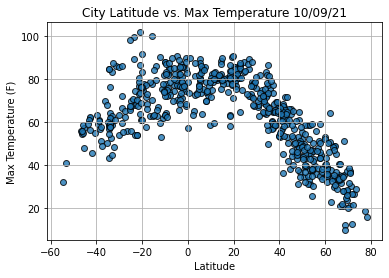

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

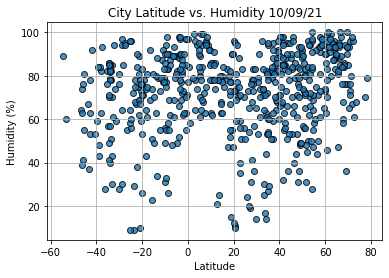

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

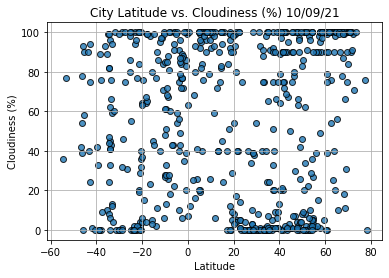

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

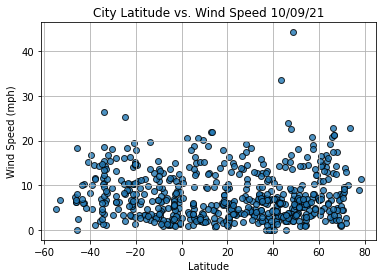

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# trying to update 